# Predicting Admission using Machine Learning


1. Problem Definition
2. Data 
3. Evaluation
4. Modelling
5. Prediction
6. Experimentation


## Problem Statement:
The purpose here is to find the chance of admission of a candidate based on his/her score in different section



##  Features
1. GRE Score (out of 340)
2. TOEFL Score (out of 120) 
3. Rating of the university (out of 5) in which he/she is trying to get admission
4. Strength of the statement of purpose (out of 5)
5. Strength of letter of recommendation (out of 5)
6. CGPA (out of 10)
7. Research experience (0 or 1)

In [331]:
# importing libraries

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline

In [332]:
# creating dataframe of comma separated value file

df = pd.read_csv('Admission_Prediction.csv')

In [333]:
# printing first 5 rows of data set

df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [334]:
# changing range of admission chance from 0-1 to 1-100 %

df['Chance of Admit'] = df['Chance of Admit'] * 100 

In [335]:
# checking if changed or not

df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,92.0
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,76.0
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,72.0
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,80.0
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,65.0


In [336]:
# number of rows and columns in out dataframe

df.shape

(500, 9)

In [337]:
# finding the count of missing values from different columns

df.isna().sum() 

Serial No.            0
GRE Score            15
TOEFL Score          10
University Rating    15
SOP                   0
LOR                   0
CGPA                  0
Research              0
Chance of Admit       0
dtype: int64

In [338]:
# replacing the missing values of 'GRE Score' column with the mode of column

df['GRE Score'].fillna(df['GRE Score'].mode()[0], inplace = True)

In [339]:
# replacing the missing values of 'TOEFL Score' column with the mode of column

df['TOEFL Score'].fillna(df['TOEFL Score'].mode()[0], inplace = True)

In [340]:
# replacing the missing values of 'University Rating' column with the mean of column

df['University Rating'].fillna(df['University Rating'].mean(), inplace = True)

In [341]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,92.0
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,76.0
2,3,312.0,104.0,3.0,3.0,3.5,8.00,1,72.0
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,80.0
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,65.0
...,...,...,...,...,...,...,...,...,...
495,496,332.0,108.0,5.0,4.5,4.0,9.02,1,87.0
496,497,337.0,117.0,5.0,5.0,5.0,9.87,1,96.0
497,498,330.0,120.0,5.0,4.5,5.0,9.56,1,93.0
498,499,312.0,103.0,4.0,4.0,5.0,8.43,0,73.0


In [342]:
# checking data types of columns 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    float64
 2   TOEFL Score        500 non-null    float64
 3   University Rating  500 non-null    float64
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 35.3 KB


In [343]:
# converting all data types to int to prevent " Unknown label type: 'continuous " error

df['GRE Score']=df['GRE Score'].astype(int)

df['TOEFL Score']=df['TOEFL Score'].astype(int)

df['University Rating']=df['University Rating'].astype(int)

df['SOP']=df['SOP'].astype(int)

df['LOR']=df['LOR'].astype(int)

df['CGPA']=df['CGPA'].astype(int)

df['Chance of Admit']=df['Chance of Admit'].astype(int)

In [344]:
# getting int values of float dtypes

df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4,4,9,1,92
1,2,324,107,4,4,4,8,1,76
2,3,312,104,3,3,3,8,1,72
3,4,322,110,3,3,2,8,1,80
4,5,314,103,2,2,3,8,0,65


## 1. Dropping the 'Chance of Admit' and 'Serial Number' as they are not going to be used as features for prediction

## 2. 'Chance of Admit' is the target column which shows the probability of admission for a candidate


In [345]:
x = df.drop(['Chance of Admit', 'Serial No.'], axis = 1)

y = df['Chance of Admit']

In [346]:
# Checking the transformed feature columns

x.head() 

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4,4,9,1
1,324,107,4,4,4,8,1
2,312,104,3,3,3,8,1
3,322,110,3,3,2,8,1
4,314,103,2,2,3,8,0


In [347]:
# checking the target columns

y.head() 

0    92
1    76
2    72
3    80
4    65
Name: Chance of Admit, dtype: int32

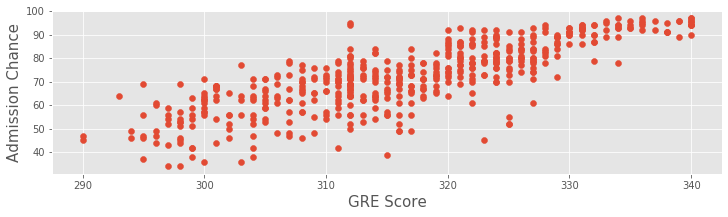

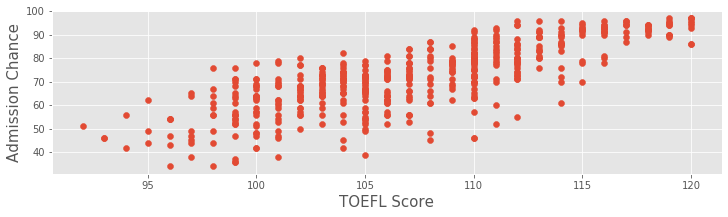

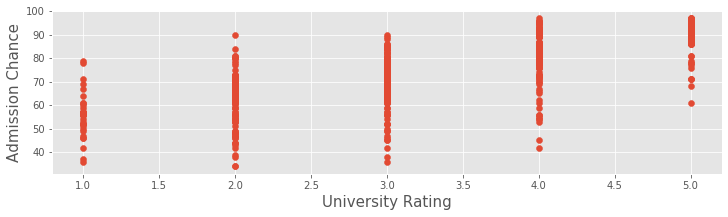

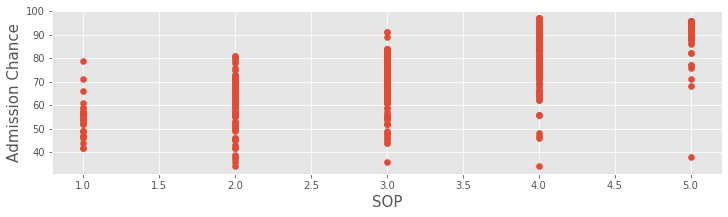

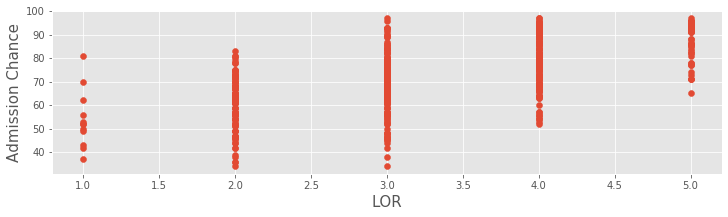

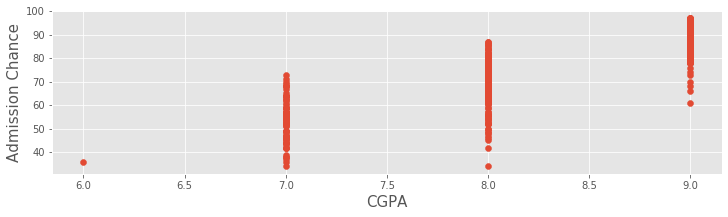

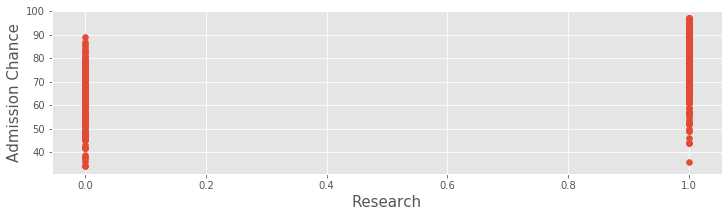

In [348]:
# Showcasing the relationship between all feature columns and target column

for col in x.columns:
    
    plt.style.use('ggplot')
    
    plt.figure(figsize = (12, 3))
    
    plt.scatter(x[col], y)
    
    plt.xlabel(col, fontsize = 15)
    
    plt.ylabel('Admission Chance', fontsize = 15)
    
    plt.show()

## Training and Testing of data 

In [349]:
# splitting the data into training and testing set

from sklearn.model_selection import train_test_split

np.random.seed(0)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 100)

In [350]:
# number of rows and columns in training set

x_train.shape, y_train.shape

((375, 7), (375,))

In [351]:
# number of rows and columns in testing set

x_test.shape, y_test.shape

((125, 7), (125,))

## Importing Models 

In [352]:
# Models from Scikit - Learn

from sklearn.linear_model import LinearRegression

reg = LinearRegression()

reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [353]:
# predicting the testing data

y_pred = reg.predict(x_test).round(2)

y_pred = y_pred.astype(int)

In [354]:
# printing first 10 predicted values

y_pred[:10]

array([88, 52, 67, 46, 71, 89, 58, 68, 82, 63])

In [355]:
# Comparing predicted results with actual values

results = pd.DataFrame({'Actual Value': y_test, 'Predicted Value': y_pred})

# getting first 20 values from results

results.head(20)

,Actual Value,Predicted Value
69,78,88
29,54,52
471,64,67
344,47,46
54,70,71
189,88,89
463,56,58
184,72,68
140,84,82
125,64,63


In [356]:
# Calculating the accuracy of the model 

from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

score_R22 = r2_score(y_test, y_pred)

score_ABS = mean_absolute_error(y_test, y_pred)

score_SEE = mean_squared_error(y_test, y_pred)

print ( '\n' , ' R2_SCORE            = ' , score_R22 * 100 )

print ( '\n' , ' MEAN_ABSOLUTE_ERROR = ' , score_ABS )

print ( '\n' , ' MEAN_SQUARED_ERROR  = ' , score_SEE  , '\n' )


  R2_SCORE            =  80.57313500477477

  MEAN_ABSOLUTE_ERROR =  4.584

  MEAN_SQUARED_ERROR  =  38.408 



## Saving the model in pickle file 

In [357]:
# Saving the model to the local file system

import pickle

filename = 'finalized_model.pickle'

pickle.dump(reg, open(filename, 'wb'))

In [358]:
loaded_model = pickle.load(open(filename, 'rb'))
a = loaded_model.predict([[300, 110, 5, 5, 5, 10, 1]])
print ( a.astype(int) ) 

[89]


## Now experimenting with 5 different model 
1. SVR : ( Support Vector Regression )
2. Random Forest Classifier
3. Logistic Regression with max_iter=1000
4. KNN : ( K-Nearest-Neighbors )
5. CLF : Decision Tree Classifier

In [359]:
# importing SVM model from scikit 

from sklearn.svm import SVR

from sklearn.tree import DecisionTreeClassifier

from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import explained_variance_score

model_SVR =  SVR(kernel = 'rbf')

model_CLF  = DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=3, min_samples_leaf=5)

In [360]:
# fitting training data into SVM model

model_SVR.fit(x_train, y_train)

model_CLF.fit(x_train, y_train)

y_pred_SVR = model_SVR.predict(x_test)

y_pred_CLF = model_CLF.predict(x_test)

y_pred_SVR = y_pred_SVR.astype(int)

y_pred_CLF = y_pred_CLF.astype(int)

In [361]:
# creating dataframe for comparing prediction for SVM

df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred_SVR})

df.head()

,Real Values,Predicted Values
69,78,73
29,54,71
471,64,71
344,47,70
54,70,72


In [362]:
# creating dataframe for comparing prediction for CLF

df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred_CLF})

df.head()

,Real Values,Predicted Values
69,78,82
29,54,57
471,64,71
344,47,57
54,70,80


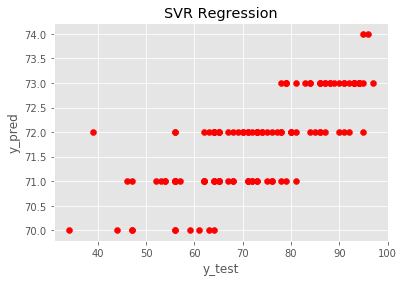

In [363]:
# Visualising the SVm results (for higher resolution and smoother curve)

plt.scatter(y_test, y_pred_SVR, color = 'red')

plt.title('SVR Regression')

plt.xlabel('y_test')

plt.ylabel('y_pred')

plt.show()

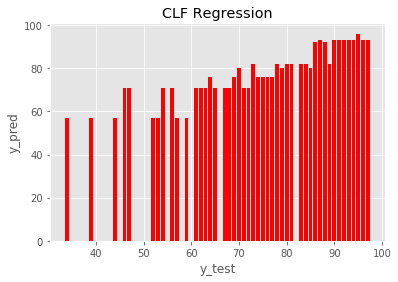

In [364]:
# Visualising the CLF results (for higher resolution and smoother curve)

plt.bar(y_test, y_pred_CLF, color = 'red')

plt.title('CLF Regression')

plt.xlabel('y_test')

plt.ylabel('y_pred')

plt.show()

## Creating dictionary in python for code reusability

In [365]:
# creating dictionary for analysing which model best fits to out data set

models = { 
           "Linear Regression" : LinearRegression(),
           
           "SVM" : SVR(kernel = 'rbf'),
           
           "Random Forest" : RandomForestClassifier(),
          
           "Logistic Regression" : LogisticRegression(max_iter=1000),
           
           "KNN" : KNeighborsClassifier(),
    
           "Decision Tree" : DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=3, min_samples_leaf=5)
         }

# function to test each model in dictionary

def fit_and_score(x_train,x_test,y_train,y_test):
    
    model_scores = {}
    
    for name,model in models.items():
        
        model.fit(x_train,y_train)
        
        y_pred = model.predict(x_test)
        
        model_scores[name] = explained_variance_score(y_test,y_pred) * 100
    
    return model_scores

In [366]:
# calling above function for printing results

model_scores = fit_and_score(x_train,x_test,y_train,y_test) 

print(model_scores)

{'Linear Regression': 81.90720427304524, 'SVM': 10.448697819008679, 'Random Forest': 59.83956751857308, 'Logistic Regression': 55.8504442969749, 'KNN': 33.12283314180278, 'Decision Tree': 76.86405645565934}


C:\Users\tanusati08\Documents\Deepak\18103011\PROJECTS\Heart_Disease\env\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Linear Regression is performing the best`

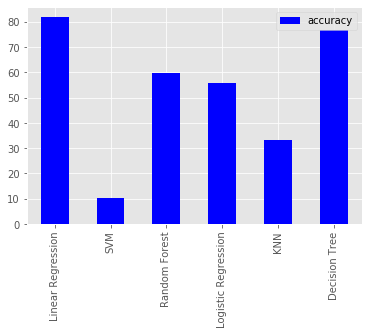

In [367]:
# matplotlib for plotting results graphically

model_compare = pd.DataFrame(model_scores,index=["accuracy"])

model_compare.T.plot.bar(color='blue');